# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [115]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

In [116]:
#open or setup the browser
from selenium.webdriver.chrome.service import Service
import os
driver_path = os.path.join(os.path.expanduser("~"),"WebDrivers","chromedriver.exe")
browser = Browser('chrome',service=Service(executable_path=driver_path))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [117]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [118]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [119]:
# Extract all rows of data
# Extract the data table
table = html_soup.find('table')

In [120]:
# Extract the rows from the table
all_rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [121]:
# Create an empty list
data_list = []
# Loop through the scraped data to create a list of rows
for rows in all_rows:
    cells = rows.find_all('td')
    data_list.append([cell.text.strip() for cell in cells])
print(data_list)

[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], [

In [122]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

#create the DataFrame
data_table_df = pd.DataFrame(data_list, columns=columns)


In [123]:
# Confirm DataFrame was created successfully
data_table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [124]:
data_table_df = data_table_df.dropna()
data_table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [125]:
# Examine data type of each column
print(data_table_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [126]:
# Change data types for data analysis
# convert terrestrial date to date time
data_table_df['terrestrial_date'] = pd.to_datetime(data_table_df['terrestrial_date'])

# convert id, sol, ls and month to integers
data_table_df[['id', 'sol', 'ls', 'month']] = data_table_df[['id', 'sol', 'ls', 'month']].astype(int)

# convert min_temp, pressure to float
data_table_df[['min_temp','pressure']] = data_table_df[['min_temp','pressure']].astype(float)

In [127]:
# Confirm type changes were successful by examining data types again
print(data_table_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [128]:
# 1. How many months are there on Mars?
number_months = data_table_df['month'].nunique()
number_months

12

In [129]:
# 2. How many Martian days' worth of data are there?
martian_days = data_table_df['sol'].count()
martian_days

1867

In [130]:
# 3. What is the average low temperature by month?
months = data_table_df.groupby('month').mean().sort_values('month')
months

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


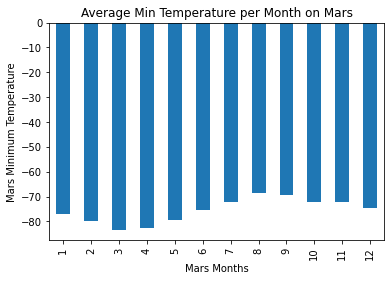

In [131]:
# Plot the average temperature by month
months['min_temp'].plot(kind='bar')

plt.title('Average Min Temperature per Month on Mars')
plt.xlabel('Mars Months')
plt.ylabel('Mars Minimum Temperature')
plt.savefig('Output/Ave_Min_Temp_on_Mars.png')
plt.show;


In [132]:
# Identify the coldest and hottest months in Curiosity's location
months.loc[(months['min_temp'] == months['min_temp'].min()) | (months['min_temp'] == months['min_temp'].max())]

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
8,718.078014,795.333333,224.347518,-68.382979,873.829787


In [133]:
# 4. Average pressure by Martian month
pressure = data_table_df.groupby('month').mean().sort_values('month')
pressure

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [134]:
months.loc[(months['pressure'] == months['pressure'].min()) | (months['pressure'] == months['pressure'].max())]


,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.299320,745.054422
9,785.843284,861.186567,254.052239,-69.171642,913.305970


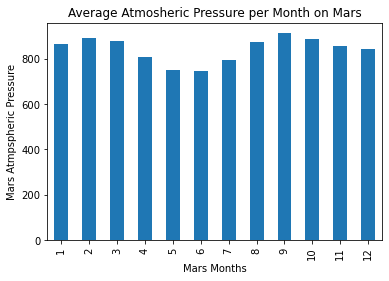

In [135]:
# Plot the average pressure by month
pressure['pressure'].plot(kind='bar')

plt.title('Average Atmosheric Pressure per Month on Mars')
plt.xlabel('Mars Months')
plt.ylabel('Mars Atmpspheric Pressure')
plt.savefig('Output/Ave_Pressure_on_Mars.png')
plt.show;

In [136]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_year_df = data_table_df[['terrestrial_date', 'month']]
mars_year_df

,terrestrial_date,month
1,2012-08-16,6
2,2012-08-17,6
3,2012-08-18,6
4,2012-08-19,6
5,2012-08-20,6
...,...,...
1863,2018-02-23,5
1864,2018-02-24,5
1865,2018-02-25,5
1866,2018-02-26,5


In [137]:
min_month = 7
seventh_month_s = mars_year_df['month'] == min_month
seventh_month_s.sum()

142

In [138]:
seventh_month_df = mars_year_df[seventh_month_s]
seventh_month_df

,terrestrial_date,month
41,2012-09-30,7
42,2012-10-01,7
43,2012-10-02,7
44,2012-10-03,7
45,2012-10-04,7
...,...,...
1331,2016-08-20,7
1332,2016-08-21,7
1333,2016-08-22,7
1334,2016-08-23,7


In [139]:
first_terrestrial_date = seventh_month_df.iloc[0,0]
first_terrestrial_date

Timestamp('2012-09-30 00:00:00')

In [140]:
min_month = 8
eighth_month_s = mars_year_df['month'] == min_month
eighth_month_s.sum()

141

In [141]:
eighth_month_df = mars_year_df[eighth_month_s]
eighth_month_df

,terrestrial_date,month
91,2012-11-20,8
92,2012-11-21,8
93,2012-11-23,8
94,2012-11-24,8
95,2012-11-25,8
...,...,...
1378,2016-10-07,8
1379,2016-10-08,8
1380,2016-10-09,8
1381,2016-10-10,8


In [142]:
first_month_eighth_terrestrial_date = eighth_month_df.iloc[0,0]
first_month_eighth_terrestrial_date

Timestamp('2012-11-20 00:00:00')

In [143]:
mars_year_excl_s = mars_year_df['terrestrial_date'] >= first_month_eighth_terrestrial_date
mars_year_excl_s

1       False
2       False
3       False
4       False
5       False
        ...  
1863     True
1864     True
1865     True
1866     True
1867     True
Name: terrestrial_date, Length: 1867, dtype: bool

In [144]:
month_seventh_exclusive_df = mars_year_df[mars_year_excl_s & seventh_month_s]
month_seventh_exclusive_df

,terrestrial_date,month
644,2014-08-18,7
645,2014-08-19,7
646,2014-08-21,7
647,2014-08-22,7
648,2014-08-23,7
...,...,...
1331,2016-08-20,7
1332,2016-08-21,7
1333,2016-08-22,7
1334,2016-08-23,7


In [145]:
anniv_terrestrial_date = month_seventh_exclusive_df.iloc[0,0]
anniv_terrestrial_date

Timestamp('2014-08-18 00:00:00')

In [146]:
mars_full_year = anniv_terrestrial_date - first_terrestrial_date
mars_full_year.days

687

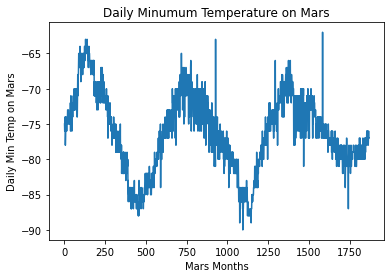

In [147]:
# Plot the daily minimum temperate by month
data_table_df['min_temp'].plot(kind='line')

plt.title('Daily Minumum Temperature on Mars')
plt.xlabel('Mars Months')
plt.ylabel('Daily Min Temp on Mars')
plt.savefig('Output/Daily_Min_Temp_on_Mars.png')
plt.show;

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [148]:
# Write the data to a CSV
data_table_df.to_csv("Output/Mars_DataFrame.csv", index=False, header=True)

In [149]:
browser.quit()